# Example

In [1]:
# import libraries
import gym
import gym_trading
import numpy as np

In [2]:
# creating environment
env = gym.make('trading-v0')

print('Number of actions:', env.action_space.n)

Number of actions: 3


In [3]:
# resetting environement
observation = env.reset()
print('Initial price of BTC:', observation)

Initial price of BTC: 422.392


In [4]:
# simulating a trading session
done = False
while not done:
    
    # random action [NOPE, BUY, SELL]
    action = np.random.randint(0, 3)

    observation, reward, done, _ = env.step(action)

print(f'Initial amount: {env.tr_game.init_amount} USD\tFinal amount: {env.tr_game.amount} {env.tr_game.currency}.')
print(f'Relative increment: {round(env.get_total_reward() * 100, 2)} %')

Initial amount: 100 USD	Final amount: 133.06589243621897 USD.
Relative increment: 33.07 %


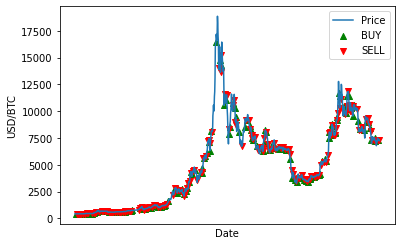

In [5]:
env.render()